In [124]:
#Math Part
import numpy as np
import pandas as pd
import time

#Graph
import matplotlib.pyplot as plt

import importlib
import circuit
import encoding
import qsvm
import fitness
import gsvm
importlib.reload(circuit)
importlib.reload(encoding)
importlib.reload(qsvm)
importlib.reload(fitness)
importlib.reload(gsvm)

<module 'gsvm' from 'c:\\Users\\londh\\qc\\Automatic_design_of_quantum_feature_maps_Genetic_Auto-Generation-main\\Qkrishi---QSVM\\gsvm.py'>

In [144]:
nqubits = 4
depth = 3
output="bank_testdata.csv"
df = pd.read_csv('bank_cleaned.csv')

bank_data = df.sample(n=2000,random_state=1)
#bank_data = np.around(bank_data)

y = bank_data['y'].values
X = bank_data[['age','job','marital','education','default','balance','housing','loan','contact',
                'day','month','duration','campaign','pdays','previous','poutcome']].values
start = time.time()

pop, pareto, logbook = gsvm.gsvm(nqubits=nqubits, depth=depth, nparameters=2,
                                    X=X, y=y, weights=[-1.0,1.0],
                                    mu=100,lambda_=50,ngen=20,mutpb=0,cxpb=1)

print(f'Simulation finished after {time.time()-start} seconds')

print(f'\nGenetic-algorithm output ({output})')
print('---------------------------------------------')
with open(output, "w") as f:
    for ide, ind in enumerate(pareto):
        genes=''.join(str(i) for i in list(ind))
        gates, acc = ind.fitness.values
        line = f'{ide},"{genes}",{gates},{acc}'
        f.write(line)
        f.write('\n')
        print(line)

d:\Anaconda\envs\qc\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
d:\Anaconda\envs\qc\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


String: 110010110001010101111000101011000000110111111110101011001101
 -> accuracy = 0.5975, gates = 6.0,recall = 0.7254901960784313
String: 000000010010001000010001110111110101100111100000001110111111
 -> accuracy = 0.565, gates = 10.0,recall = 0.6617647058823529
String: 101100011011001000101111010110011010101111011000001100101110
 -> accuracy = 0.6125, gates = 7.0,recall = 0.7549019607843137
String: 000001010101110101011101001111110001001110101001111001000101
 -> accuracy = 0.5725, gates = 9.0,recall = 0.8088235294117647
String: 100100010011101010111001000110010010110011001010100110000010
 -> accuracy = 0.565, gates = 10.0,recall = 0.6372549019607843
String: 010110110111001010111110001110000100000110100101010100001001
 -> accuracy = 0.57, gates = 5.0,recall = 0.6568627450980392
String: 100001010010000000000110110011111110110111010001010100011000
 -> accuracy = 0.5675, gates = 9.0,recall = 0.6519607843137255
String: 001100000000101101100010110110101010011100100110101100110001
 -> accur

KeyboardInterrupt: 

In [141]:
iot_result = pd.read_csv('bank_testdata.csv',header=None)

def ordenar_salidas_pareto(dataframe):
    dataframe.columns=['ind','circ','gates','accuracy']
    dataframe.sort_values(['gates','accuracy'], ascending=[False,False],inplace=True)
    dataframe.reset_index(inplace=True)
    dataframe.pop('index')
    return dataframe

iot_salidas = ordenar_salidas_pareto(iot_result)
iot_salidas # Queremos ver el primer circuito del dataframe yya ordenado por accuracy (mejor ind)

,ind,circ,gates,accuracy
0,237,1110011000100101110001010010100001000111000101...,2.819200,0.64000
1,236,0100111000100101110101010011011100011000101110...,1.054805,0.63750
2,231,1000110111101001110110100110011100111101010001...,1.053611,0.63625
3,232,1100010111101001010010111100010100111101011010...,1.053611,0.63625
4,233,1100010111101001010010111100010101111101011010...,1.053611,0.63625
...,...,...,...,...
233,10,0100101010010001010010111110011100110100110001...,0.000000,0.50375
234,11,0100010110010001010010101010011100011000101110...,0.000000,0.50375
235,12,0100010110010001010011010110011100011000101110...,0.000000,0.50375
236,13,1010010100010001010010111101011100011000101110...,0.000000,0.50375


['11100', '11000', '10010', '11100', '01010', '01010', '00010', '00111', '00010', '10110', '10010', '01010']
8.0


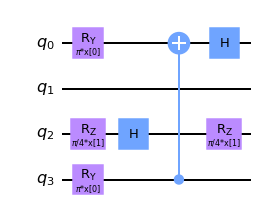

In [142]:
from qiskit.circuit import ParameterVector, QuantumCircuit
from qiskit import QuantumRegister

def coding_bits(b):
    c = [b[n:n+5] for n,i in enumerate(b) if n%5==0]
    c_p=[]
    coding_0=[]
    for i in range(len(c)):
        for j in c[i]:
            c_p.append(str(j))
    np.asarray(c_p)
    c = [c_p[n:n+5] for n,i in enumerate(c_p) if n%5==0]
    for i in c:
        coding_0.append(''.join(i))
    return coding_0

class CircuitConversor:

    def __init__(self, nqubits, nparameters):
        gates = {}
        for n, suffix in enumerate(['00','01','10','11']):
            angle = np.pi / (2**n)
            gates['000'+suffix] = (self.make_H(), 1.0)
            gates['001'+suffix] = (self.make_cx(), 2.0)
            gates['010'+suffix] = (self.make_id(), 0.0)
            gates['011'+suffix] = (self.make_rx(angle), 1.0)
            gates['100'+suffix] = (self.make_rz(angle), 1.0)
            gates['101'+suffix] = (self.make_id(), 0.0)
            gates['110'+suffix] = (self.make_id(), 0.0)
            gates['111'+suffix] = (self.make_ry(angle), 1.0)
        self.gates = gates
        self.nqubits = nqubits
        self.register = QuantumRegister(nqubits, 'q')
        self.nparameters = nparameters
        self.nqubits = nqubits
        self.x = ParameterVector('x', nparameters)

    def __call__(self, coding_0):
        print(coding_0)
        circuit = QuantumCircuit(self.register)
        k = 0
        cost = 0
        for ndx, z in enumerate(coding_0):
            qubit = ndx % self.nqubits
            target = (ndx + 1) % self.nqubits
            fn, weight = self.gates[z]
            k = fn(circuit, k, qubit, target)
            cost += weight
        for i in range(k, self.nparameters):
            circuit.rz(self.x[i]*0, self.register[0])
        return circuit, cost

    def make_id(self):
        def operation(circuit, k, qubit, target):
            return k
        return operation

    def make_H(self):
        def operation(circuit, k, qubit, target):
            circuit.h(self.register[qubit])
            return k
        return operation

    def make_cx(self):
        def operation(circuit, k, qubit, target):
            circuit.cx(self.register[qubit], self.register[target])
            return k
        return operation

    def make_rx(self, angle):
        def operation(circuit, k, qubit, target):
            circuit.rx(self.x[k%self.nparameters] * angle,
                       self.register[qubit])
            return k+1
        return operation

    def make_ry(self, angle):
        def operation(circuit, k, qubit, target):
            circuit.ry(self.x[k%self.nparameters] * angle,
                       self.register[qubit])
            return k+1
        return operation

    def make_rz(self, angle):
        def operation(circuit, k, qubit, target):
            circuit.rz(self.x[k%self.nparameters] * angle,
                       self.register[qubit])
            return k+1
        return operation

cc = CircuitConversor(nqubits=nqubits, nparameters=2)
fm, puertas = cc(coding_bits(iot_salidas.circ[0]))
print(puertas)
fm.draw(output='mpl')

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score, accuracy_score
import matplotlib.pyplot as plt

In [121]:
def featuremap_performance(pop:str,nqubits:int) -> None:
    '''Returns the performance of a feature map on all of the dataset'''

    df = pd.read_csv('bank_cleaned.csv')
    bank_data = df.sample(n = 10000)

    y = bank_data['y'].values
    X = bank_data[['age','job','marital','education','default','balance',
                'housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome']].values


    fitness_obj = fitness.Fitness(nqubits,2,X,y,debug=True)

    training_features, training_labels, test_features, test_labels = fitness.Dataset(X,y)

    model = qsvm.QSVM(lambda parameters: fitness_obj.cc(pop, parameters)[0],training_features,training_labels)#fitness_obj(pop)

    y_pred = model.predict(test_features)

    cm = confusion_matrix(test_labels, y_pred)

    #cm_display = ConfusionMatrixDisplay(cm).plot()
    ConfusionMatrixDisplay.from_predictions(test_labels, y_pred)
    plt.show()
    recall = recall_score(test_labels, y_pred)
    acc  = accuracy_score(test_labels, y_pred)

    print(f'String = {pop},\n accuracy = {acc}, recall = {recall}')
    
    return None

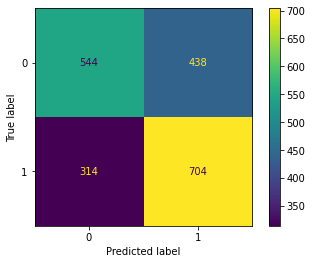

String = 101101101111001010011001011101101001110111011100100111010100,
 accuracy = 0.624, recall = 0.6915520628683693


In [138]:
featuremap_performance(iot_salidas.circ[0],nqubits)

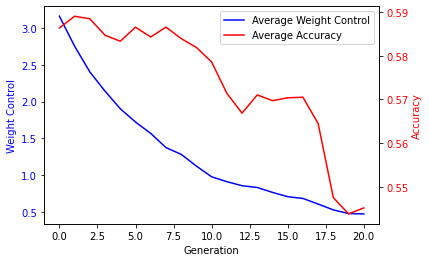

<Figure size 600x400 with 0 Axes>

In [143]:
gen = logbook.select("gen")
wc = logbook.chapters["wc"].select("media")
acc = logbook.chapters["acc"].select("media")

import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
plt.figure(dpi = 100)
line1 = ax1.plot(gen, wc ,"b-", label="Average Weight Control")
ax1.set_xlabel("Generation")
ax1.set_ylabel("Weight Control", color="b")
for tl in ax1.get_yticklabels():
    tl.set_color("b")

ax2 = ax1.twinx()
line2 = ax2.plot(gen, acc, "r-", label="Average Accuracy")
ax2.set_ylabel("Accuracy", color="r")
for tl in ax2.get_yticklabels():
    tl.set_color("r")

lns = line1 + line2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc="best")

plt.show()